# <center> Heart Attack Prediction (Classification)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import RocCurveDisplay,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
import pickle

## Loading Dataset

In [2]:
df = pd.read_csv('./Heart Attack Data Set.csv')

## Viewing Dataset

In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
df.cp.unique()

array([3, 2, 1, 0], dtype=int64)

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## Summary Statistics

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## Missing Values

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.duplicated().sum()

1

In [12]:
df.drop_duplicates(inplace=True)

# Graphical EDA

## Univariate EDA

### 1. Histogram

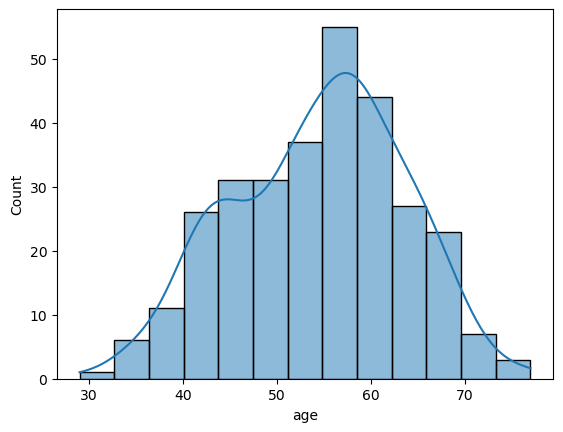

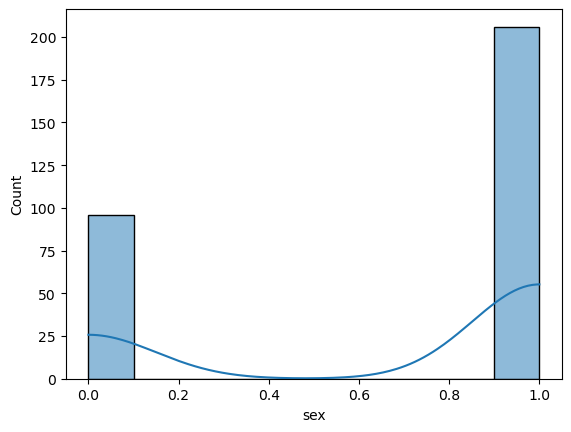

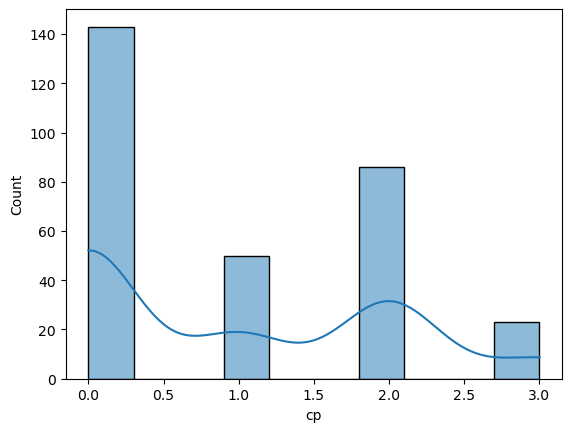

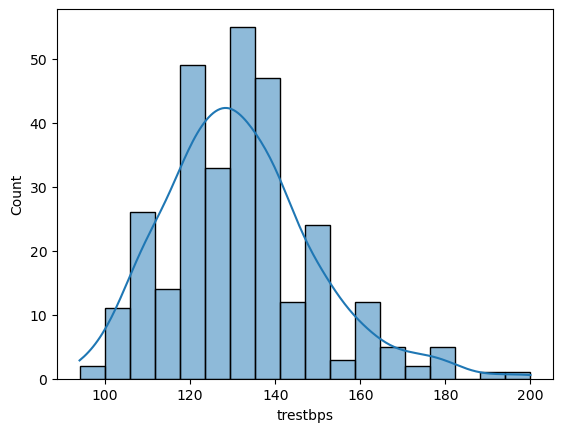

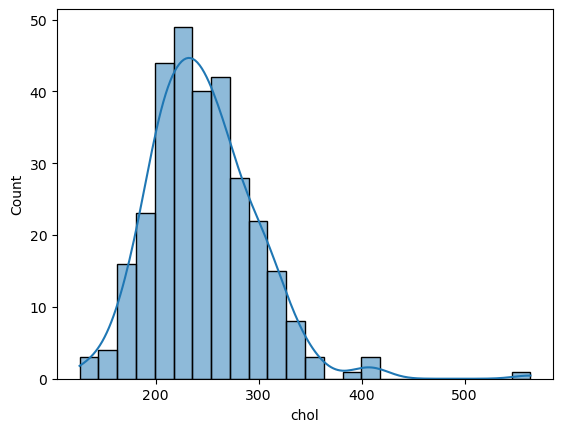

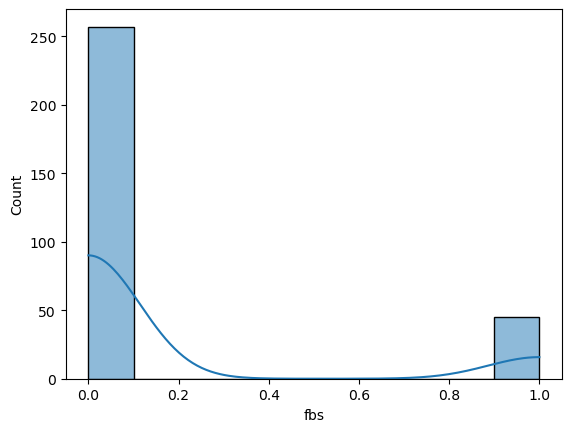

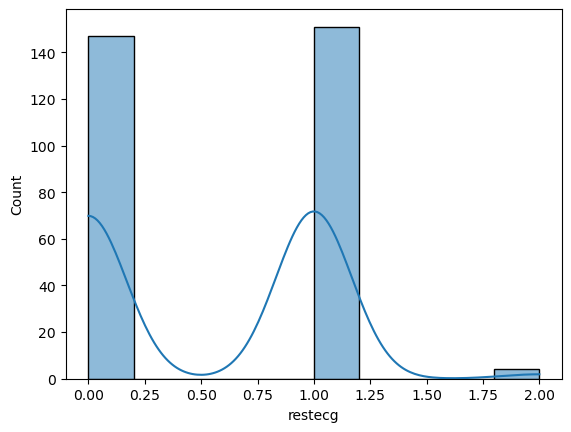

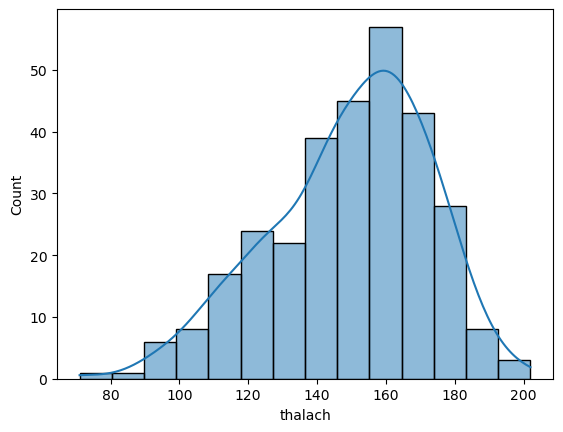

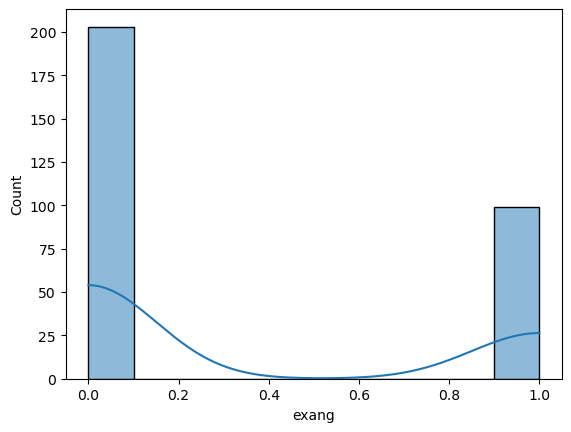

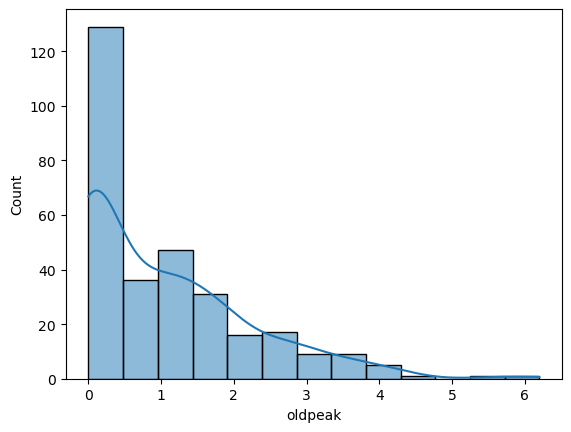

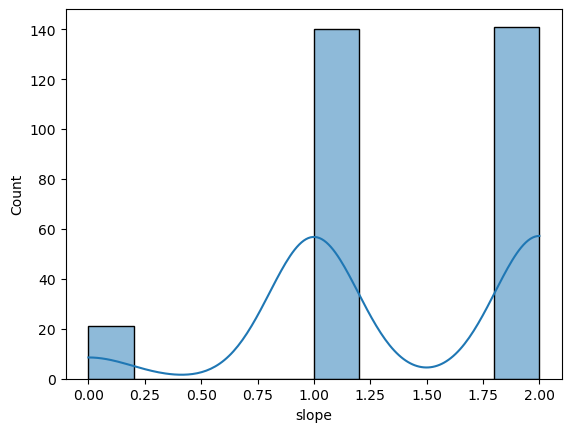

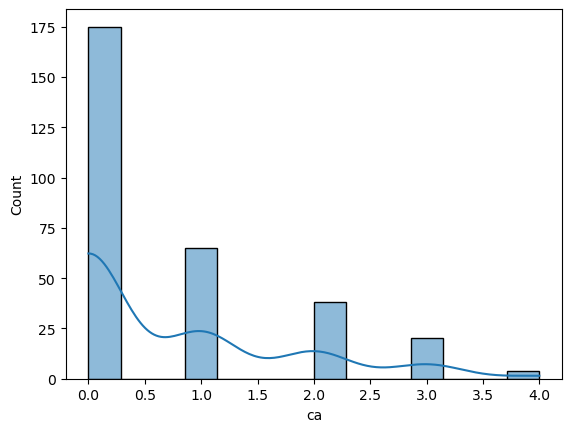

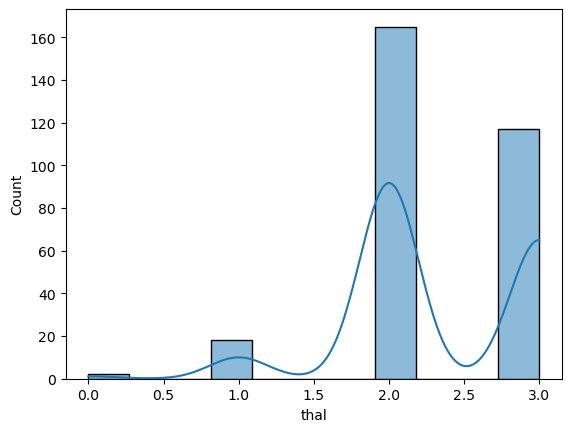

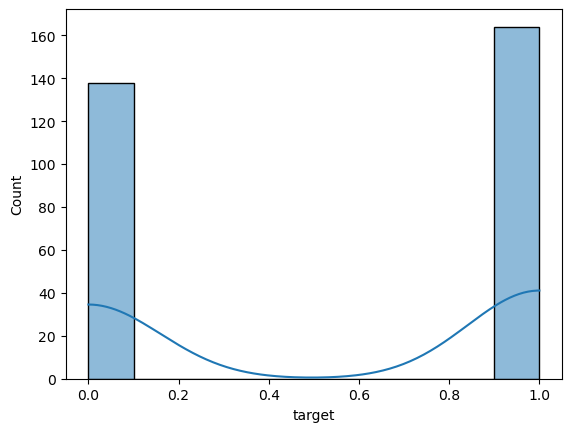

In [13]:
for col in df.columns:
    sns.histplot(x=df[col],kde=True)
    plt.show()

### 2. Boxplot

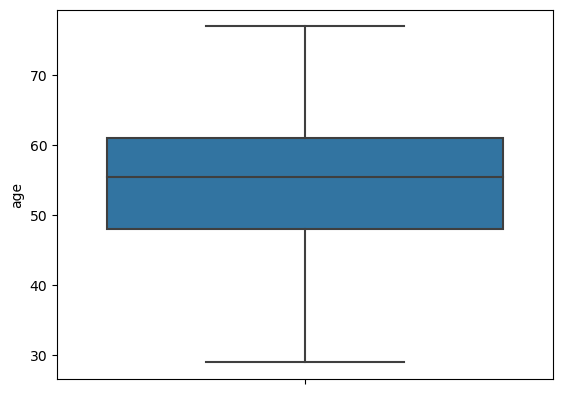

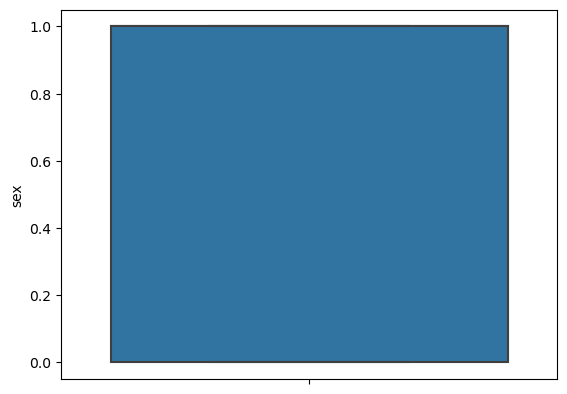

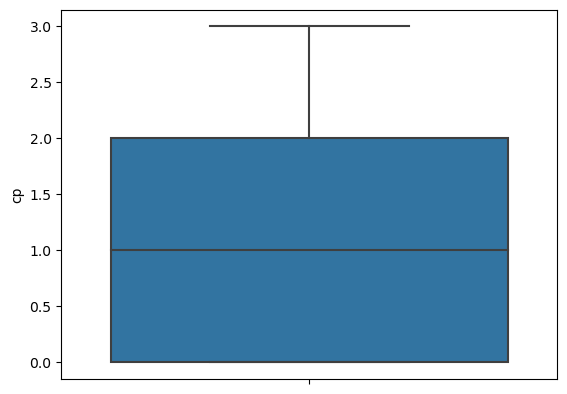

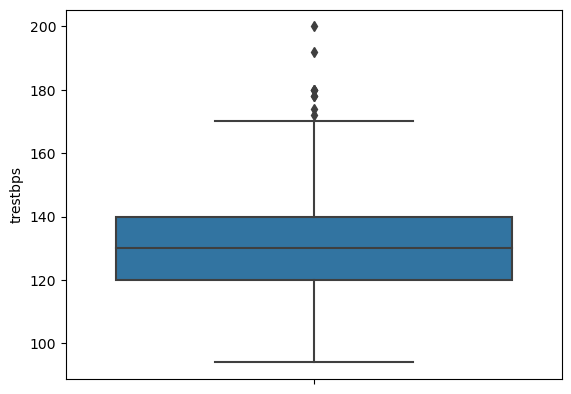

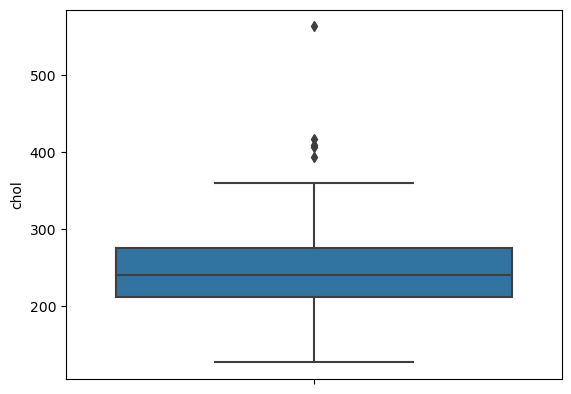

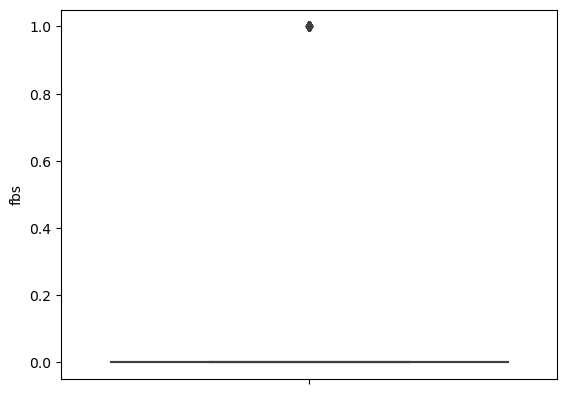

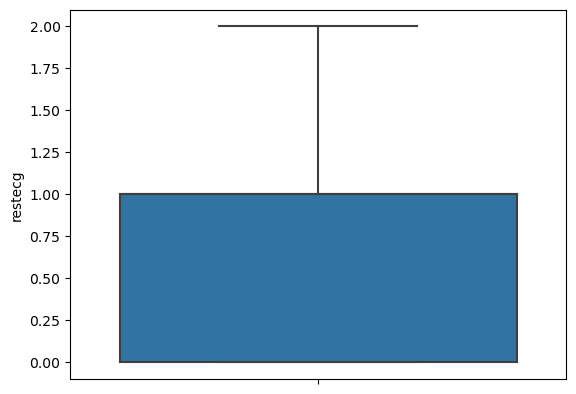

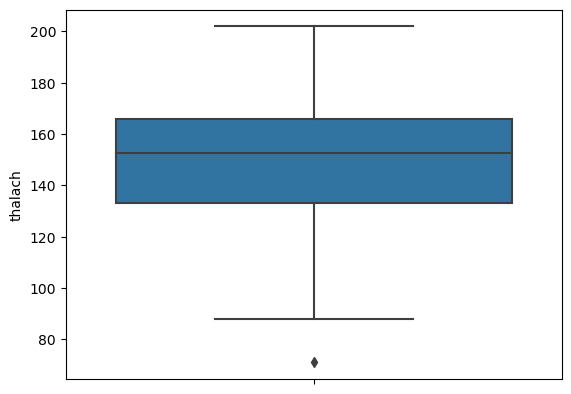

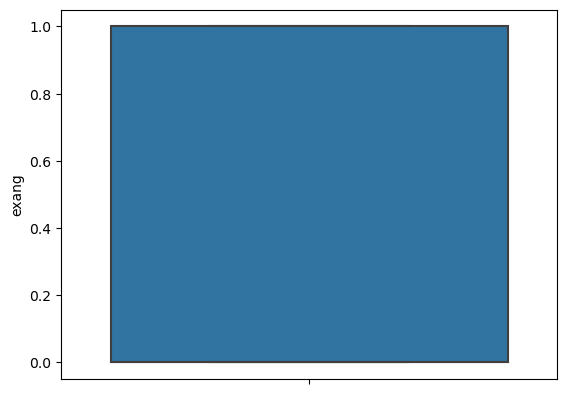

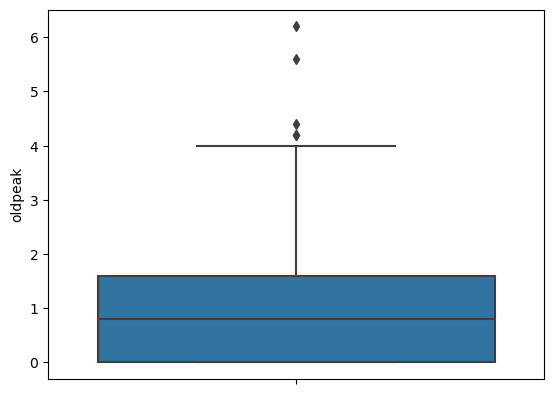

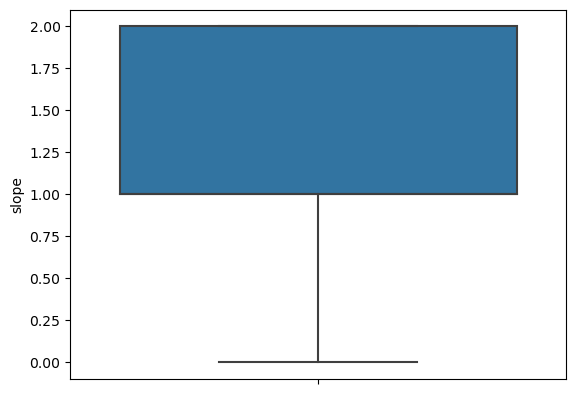

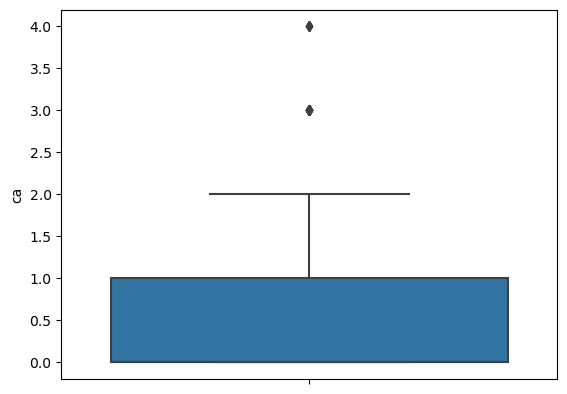

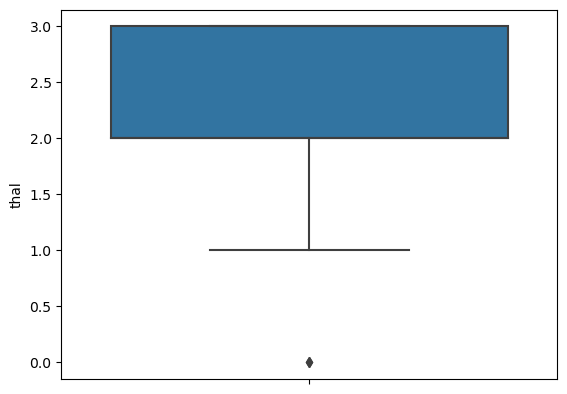

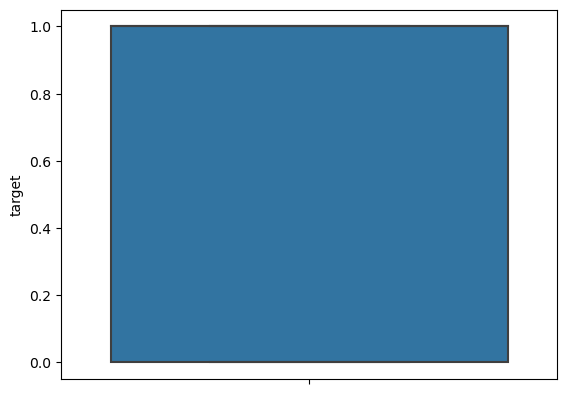

In [14]:
for col in df.columns:
    sns.boxplot(data=df,y=df[col])
    plt.show()

### 3. Countplot (For Categorical columns only)

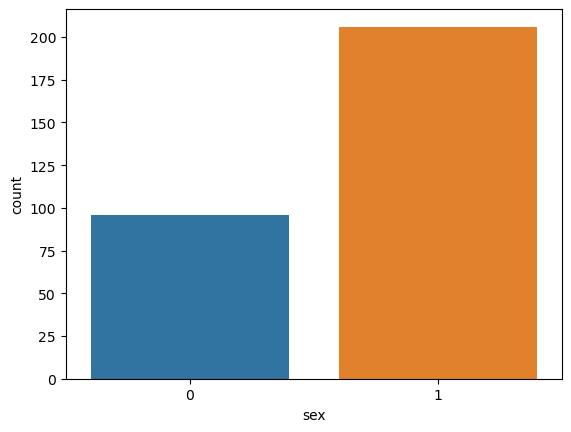

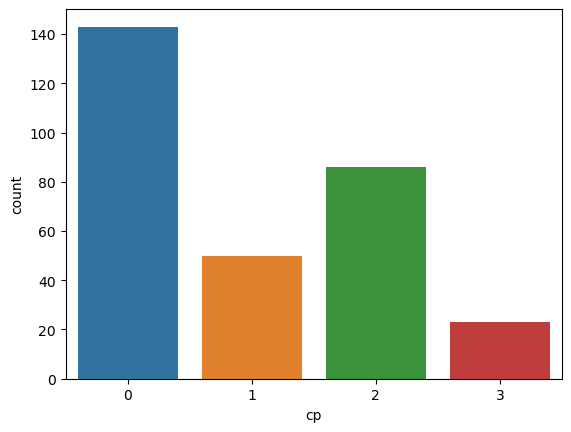

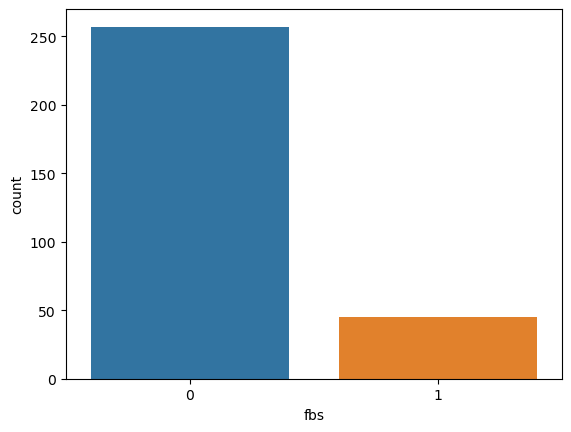

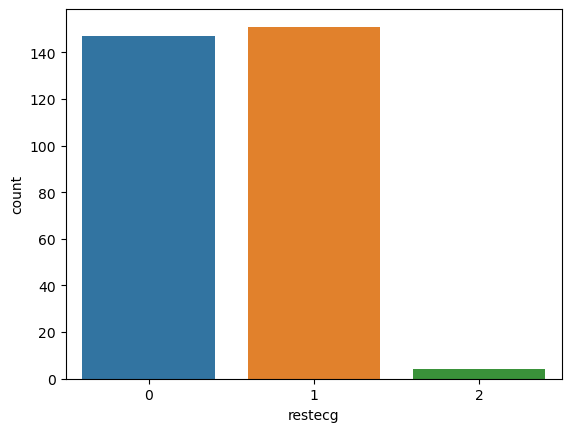

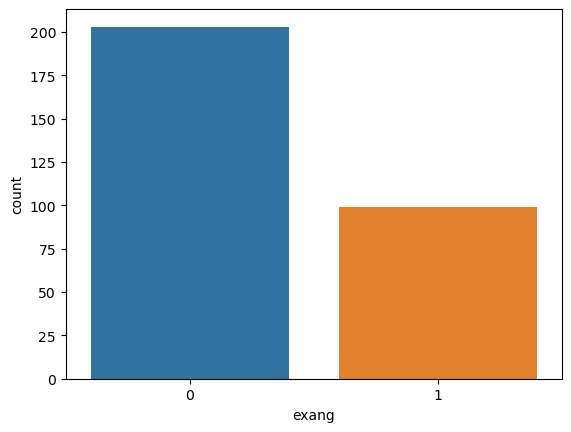

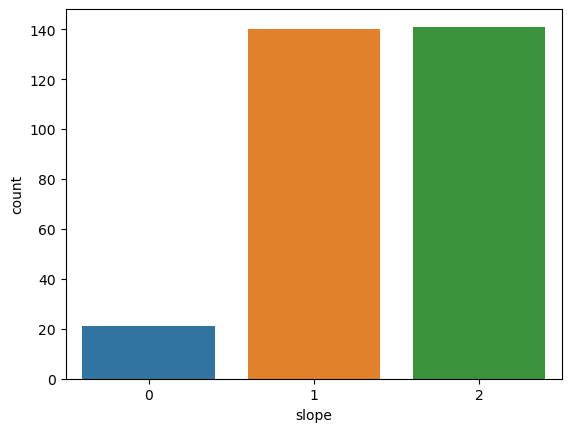

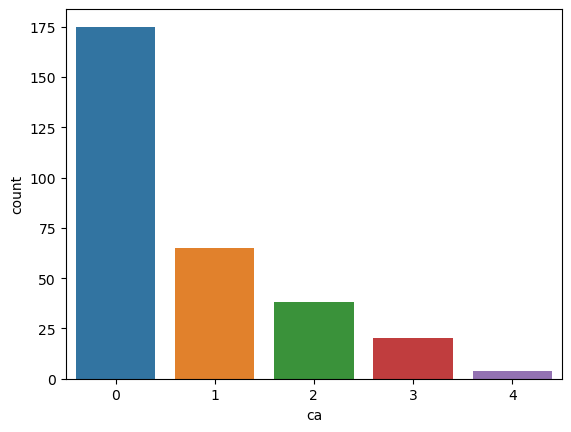

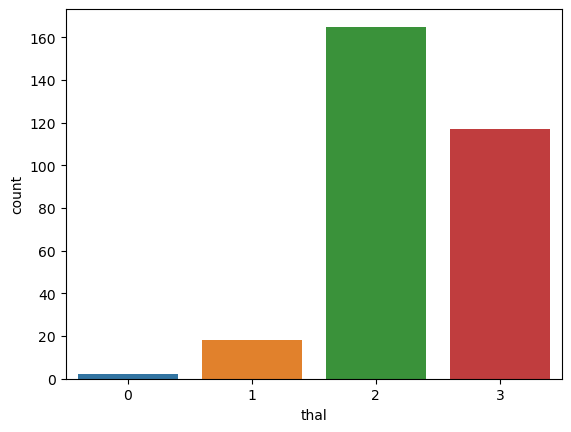

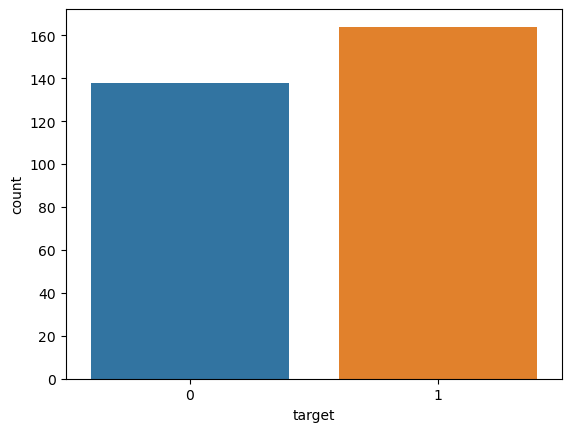

In [15]:
categorical_columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal','target']
for col in categorical_columns:
    sns.countplot(data=df,x=col)
    plt.show()

**Inference:Need balancing of the target column**

# Multivariate EDA

## 1. Heatmap

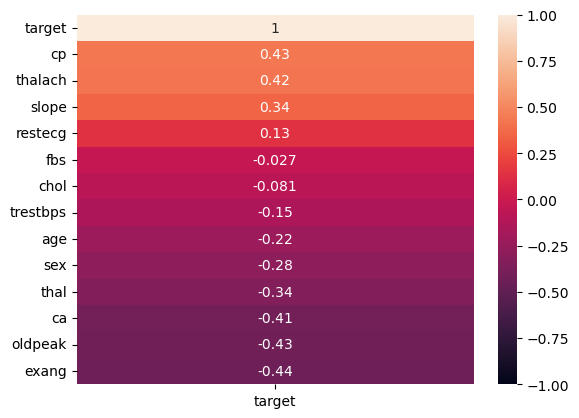

In [16]:
sns.heatmap(df.corr()[['target']].sort_values(by='target',ascending=False),vmax=1,vmin=-1,annot=True)
plt.show()

# Preprocessing

## 1. Balancing Target

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
x = df.iloc[:,:-1].values

In [19]:
y = df.iloc[:,-1].values

In [20]:
smote = SMOTE()

In [21]:
x,y = smote.fit_resample(x,y)

In [22]:
x.shape

(328, 13)

In [23]:
y.shape

(328,)

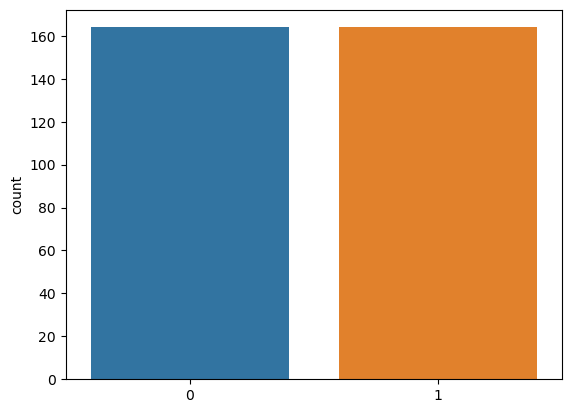

In [24]:
sns.countplot(x=y);

#### The Target column 'target' balanceed now

## Model Selection

In [25]:
models = {
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'KNeighborsClassifier':KNeighborsClassifier()
}

In [26]:
for name ,model in models.items():
    scores = cross_val_score(model,x,y,scoring="accuracy",cv=10,n_jobs=-1)
    print(f"Cross Validation Model:{name}\n Score: {(np.mean(scores)*100)}")
    print("*"*50)

Cross Validation Model:LogisticRegression
 Score: 82.66098484848484
**************************************************
Cross Validation Model:DecisionTreeClassifier
 Score: 76.86553030303031
**************************************************
Cross Validation Model:RandomForestClassifier
 Score: 84.18560606060606
**************************************************
Cross Validation Model:KNeighborsClassifier
 Score: 66.46780303030305
**************************************************


#### Inference: Best Model = RandomForestClassifier

# Splitting Data into Train and Test Dataset

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [28]:
x_train.shape

(262, 13)

In [29]:
y_train.shape

(262,)

In [30]:
x_test.shape

(66, 13)

In [31]:
y_test.shape

(66,)

# Prediction

In [32]:
model = RandomForestClassifier()
model

RandomForestClassifier()

In [33]:
name = RandomForestClassifier

In [34]:
model.fit(x_train,y_train)
print(f"Model Trained with {name}")
score_train = accuracy_score(y_train,model.predict(x_train))
score_test =accuracy_score(y_test,model.predict(x_test))
conf_train = confusion_matrix(y_train,model.predict(x_train))
conf_test = confusion_matrix(y_test,model.predict(x_test))
print('Accuracy Training Score:',score_train*100)
print('Accuracy Test Score:',score_test*100)
print('Confusion Matrix Training Score:\n',conf_train)
print('Confusion Matrix Test Score:\n',conf_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))

Model Trained with <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Accuracy Training Score: 100.0
Accuracy Test Score: 80.3030303030303
Confusion Matrix Training Score:
 [[132   0]
 [  0 130]]
Confusion Matrix Test Score:
 [[24  8]
 [ 5 29]]
Wrong Predictions made: 13 / 66


In [ ]:
model.predict()

### Classification Report

### Plotting Roc Curve

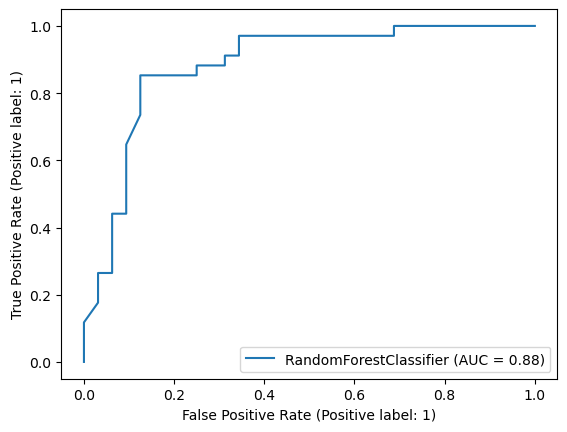

In [35]:
ROC_Display = RocCurveDisplay.from_estimator(model,x_test,y_test)

## Saving the Model

In [36]:
pickle.dump(model, open('MODEL.pkl', 'wb'))